# Heart Attacks in Youth vs Adult Nigerians
## This notebook seeks to create a model to detect if heart attacks are likely to happen to a youth or adult

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [18]:
data = pd.read_csv('heart_attack_youth_vs_adult_nigeria.csv')

In [19]:
data.describe()

,BMI
count,898796.000000
mean,27.502941
std,7.220324
min,15.000000
25%,21.200000
50%,27.500000
75%,33.800000
max,40.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898796 entries, 0 to 898795
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   State                  898796 non-null  object 
 1   Age_Group              898796 non-null  object 
 2   Gender                 898796 non-null  object 
 3   BMI                    898796 non-null  float64
 4   Smoking_Status         898796 non-null  object 
 5   Alcohol_Consumption    673208 non-null  object 
 6   Exercise_Frequency     898796 non-null  object 
 7   Hypertension           898796 non-null  object 
 8   Diabetes               898796 non-null  object 
 9   Cholesterol_Level      898796 non-null  object 
 10  Family_History         898796 non-null  object 
 11  Stress_Level           898796 non-null  object 
 12  Diet_Type              898796 non-null  object 
 13  Heart_Attack_Severity  898796 non-null  object 
 14  Hospitalized           898796 non-nu

In [21]:
data.head()

,State,Age_Group,Gender,BMI,Smoking_Status,Alcohol_Consumption,Exercise_Frequency,Hypertension,Diabetes,Cholesterol_Level,Family_History,Stress_Level,Diet_Type,Heart_Attack_Severity,Hospitalized,Survived,Income_Level,Urban_Rural,Employment_Status
0,Ondo,Youth,Female,34.5,Non-Smoker,High,Occasionally,No,Yes,Borderline,Yes,Low,Unhealthy,Mild,No,Yes,Medium,Urban,Employed
1,FCT,Youth,Male,15.2,Non-Smoker,High,Occasionally,No,Yes,High,No,Moderate,Unhealthy,Mild,Yes,No,High,Rural,Employed
2,Borno,Youth,Female,25.0,Non-Smoker,High,Weekly,No,Yes,High,No,Moderate,Mixed,Moderate,Yes,No,Medium,Rural,Student
3,Katsina,Youth,Male,19.7,Non-Smoker,High,Occasionally,No,No,High,Yes,High,Healthy,Mild,Yes,No,Low,Rural,Unemployed
4,Kaduna,Adult,Female,35.6,Non-Smoker,Low,Rarely,No,Yes,High,Yes,High,Healthy,Moderate,No,Yes,Low,Rural,Student


In [22]:
ohecolumns = ['Age_Group', 'Gender', 'Smoking_Status', 'Family_History', 'Hypertension', 'Diabetes', 'Hospitalized', 'Survived', 'Employment_Status']

In [23]:
data2 = pd.get_dummies(data, columns=ohecolumns, drop_first=True)

In [24]:
data2.head()

,State,BMI,Alcohol_Consumption,Exercise_Frequency,Cholesterol_Level,Stress_Level,Diet_Type,Heart_Attack_Severity,Income_Level,Urban_Rural,Age_Group_Youth,Gender_Male,Smoking_Status_Smoker,Family_History_Yes,Hypertension_Yes,Diabetes_Yes,Hospitalized_Yes,Survived_Yes,Employment_Status_Student,Employment_Status_Unemployed
0,Ondo,34.5,High,Occasionally,Borderline,Low,Unhealthy,Mild,Medium,Urban,True,False,False,True,False,True,False,True,False,False
1,FCT,15.2,High,Occasionally,High,Moderate,Unhealthy,Mild,High,Rural,True,True,False,False,False,True,True,False,False,False
2,Borno,25.0,High,Weekly,High,Moderate,Mixed,Moderate,Medium,Rural,True,False,False,False,False,True,True,False,True,False
3,Katsina,19.7,High,Occasionally,High,High,Healthy,Mild,Low,Rural,True,True,False,True,False,False,True,False,False,True
4,Kaduna,35.6,Low,Rarely,High,High,Healthy,Moderate,Low,Rural,False,False,False,True,False,True,False,True,True,False


In [26]:

data2[['State', 'Alcohol_Consumption', 'Exercise_Frequency', 'Cholesterol_Level', 'Stress_Level', 'Heart_Attack_Severity', 'Income_Level']] = data2[['State', 'Alcohol_Consumption', 'Exercise_Frequency', 'Cholesterol_Level', 'Stress_Level', 'Heart_Attack_Severity', 'Income_Level']].apply(LabelEncoder().fit_transform) 

In [35]:
data2.head()

,State,BMI,Alcohol_Consumption,Exercise_Frequency,Cholesterol_Level,Stress_Level,Diet_Type,Heart_Attack_Severity,Income_Level,Urban_Rural,Age_Group_Youth,Gender_Male,Smoking_Status_Smoker,Family_History_Yes,Hypertension_Yes,Diabetes_Yes,Hospitalized_Yes,Survived_Yes,Employment_Status_Student,Employment_Status_Unemployed
0,28,34.5,0,1,0,1,Unhealthy,0,2,Urban,True,False,False,True,False,True,False,True,False,False
1,14,15.2,0,1,1,2,Unhealthy,0,0,Rural,True,True,False,False,False,True,True,False,False,False
2,7,25.0,0,3,1,2,Mixed,1,2,Rural,True,False,False,False,False,True,True,False,True,False
3,20,19.7,0,1,1,0,Healthy,0,1,Rural,True,True,False,True,False,False,True,False,False,True
4,18,35.6,1,2,1,0,Healthy,1,1,Rural,False,False,False,True,False,True,False,True,True,False


<Axes: >

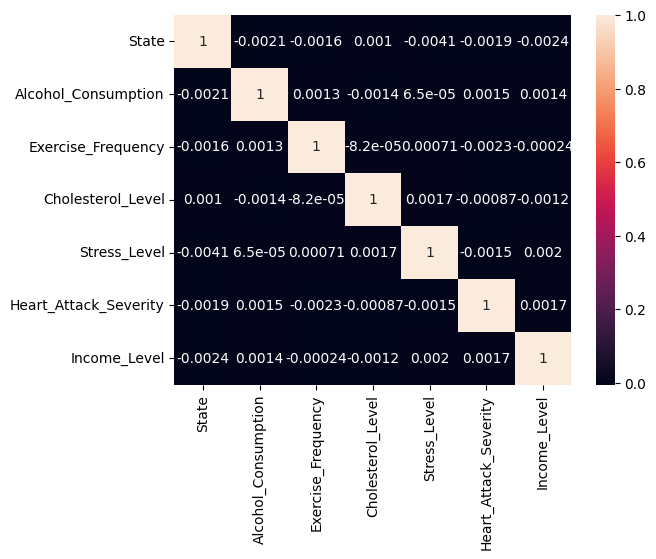

In [37]:
sns.heatmap(data2[['State', 'Alcohol_Consumption', 'Exercise_Frequency', 'Cholesterol_Level', 'Stress_Level', 'Heart_Attack_Severity', 'Income_Level']].corr(), annot=True)

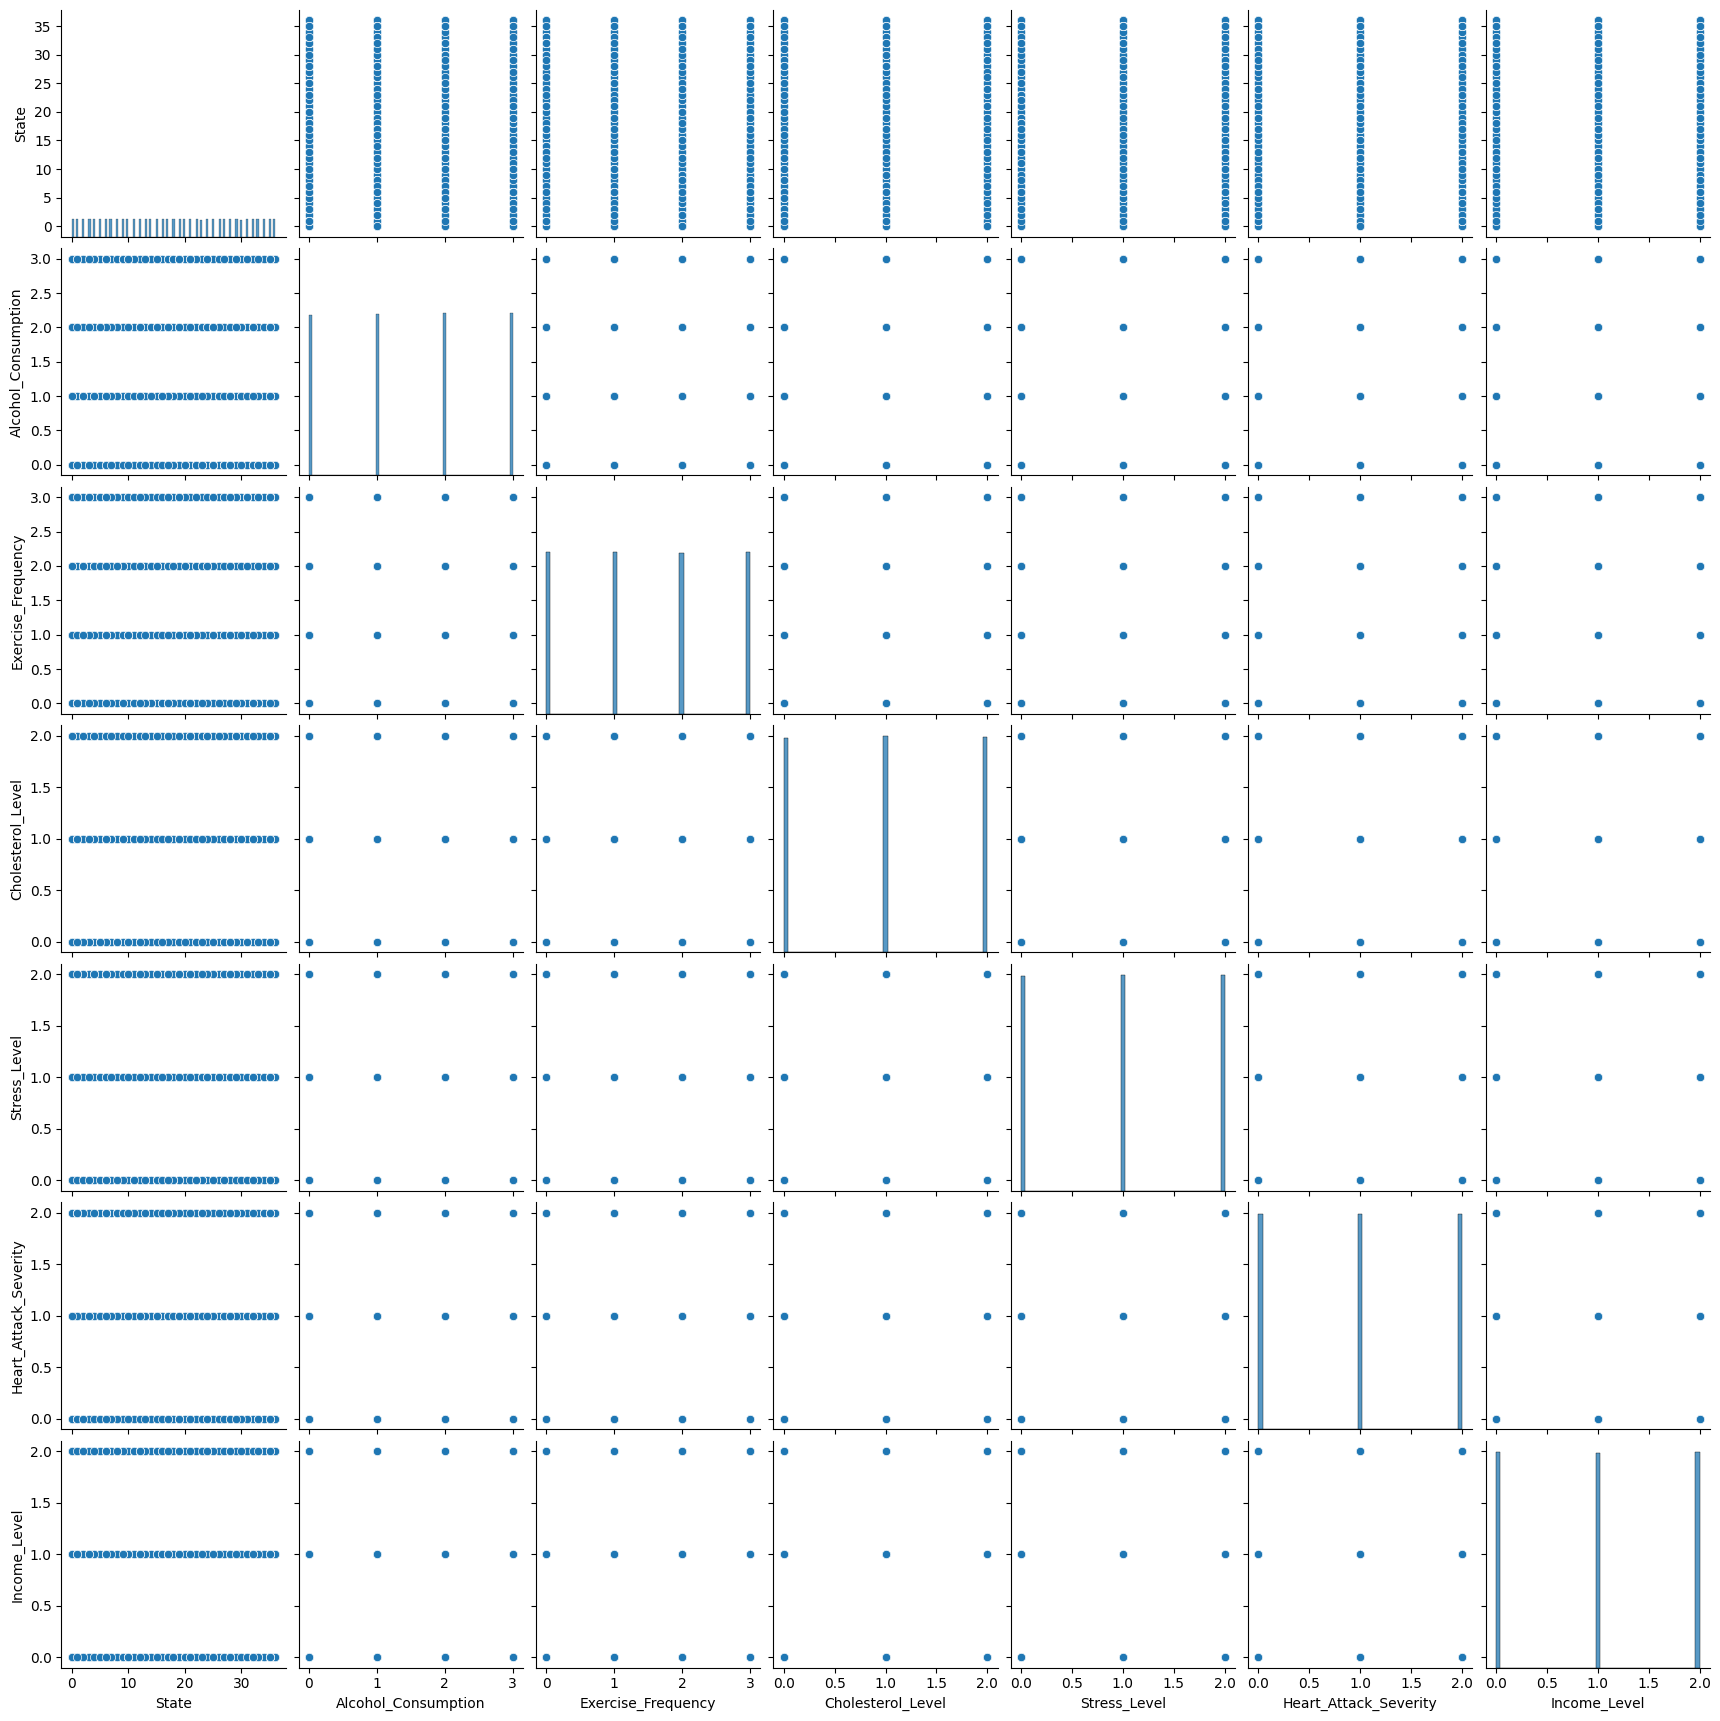

In [32]:
sns.pairplot(data2[['State', 'Alcohol_Consumption', 'Exercise_Frequency', 'Cholesterol_Level', 'Stress_Level', 'Heart_Attack_Severity', 'Income_Level']])

In [ ]:
#here is a comment  